In [338]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Statement:
An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

In [339]:
#Reading the dataset
df = pd.read_excel('H:\Great learning\RFM\Sales_Data.xlsx', parse_dates = ['ORDERDATE'])

In [340]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
5,10180,29,86.13,9,2497.77,2018-11-11,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
6,10188,48,114.84,1,5512.32,2018-11-18,567,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium
7,10211,41,114.84,14,4708.44,2019-01-15,510,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
8,10223,37,107.18,1,3965.66,2019-02-20,475,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium
9,10237,23,101.44,7,2333.12,2019-04-05,432,Shipped,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small


In [341]:
df.tail(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2737,10293,32,60.06,1,1921.92,2019-09-09,3003,Shipped,Ships,54,S72_3212,Amica Models & Co.,011-4988555,Via Monte Bianco 34,Torino,10100,Italy,Accorti,Paolo,Small
2738,10306,35,59.51,6,2082.85,2019-10-14,2969,Shipped,Ships,54,S72_3212,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,Manchester,EC2 5NT,UK,Ashworth,Victoria,Small
2739,10315,40,55.69,5,2227.60,2019-10-29,2955,Shipped,Ships,54,S72_3212,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Small
2740,10327,37,86.74,4,3209.38,2019-11-10,2944,Resolved,Ships,54,S72_3212,Danish Wholesale Imports,31 12 3555,Vinb'ltet 34,Kobenhavn,1734,Denmark,Petersen,Jytte,Medium
2741,10337,42,97.16,5,4080.72,2019-11-21,2934,Shipped,Ships,54,S72_3212,Classic Legends Inc.,2125558493,5905 Pompton St.,NYC,10022,USA,Hernandez,Maria,Medium
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [343]:
df.shape

(2747, 20)

In [344]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [345]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [346]:
df.skew()

C:\Users\balar\AppData\Local\Temp\ipykernel_3788\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ORDERNUMBER            -0.006995
QUANTITYORDERED         0.369286
PRICEEACH               0.697222
ORDERLINENUMBER         0.575327
SALES                   1.155940
DAYS_SINCE_LASTORDER   -0.002983
MSRP                    0.575646
dtype: float64

In [347]:
df.PRODUCTLINE.value_counts()

Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64

In [348]:
df.COUNTRY.value_counts()

USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: COUNTRY, dtype: int64

In [349]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values(ascending=False))
        print('\n')

STATUS :  6
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64


PRODUCTLINE :  7
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64


PRODUCTCODE :  109
S18_3232    51
S24_2840    28
S24_1444    28
S32_2509    28
S50_1392    28
            ..
S24_2887    22
S18_2248    21
S18_1749    21
S18_4409    21
S24_3969    21
Name: PRODUCTCODE, Length: 109, dtype: int64


CUSTOMERNAME :  89
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co

In [350]:
for column in df.columns:
    if df[column].dtype == 'int64':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values(ascending=False))
        print('\n')

ORDERNUMBER :  298
10106    18
10222    18
10275    18
10386    18
10398    18
         ..
10364     1
10118     1
10144     1
10387     1
10294     1
Name: ORDERNUMBER, Length: 298, dtype: int64


QUANTITYORDERED :  58
34    111
21    101
46     99
27     98
45     96
41     95
31     95
26     94
29     92
32     90
20     90
25     90
22     89
48     89
44     88
49     88
24     88
33     88
38     88
36     87
37     83
43     81
28     79
39     79
40     77
30     74
42     74
23     71
47     70
35     67
50     63
55     16
66      5
15      4
51      4
61      3
18      3
60      3
76      3
59      3
56      3
19      3
64      3
54      2
70      2
6       2
11      2
10      2
97      1
85      1
62      1
52      1
16      1
13      1
58      1
65      1
12      1
77      1
Name: QUANTITYORDERED, dtype: int64


ORDERLINENUMBER :  18
1     298
2     282
3     261
4     247
5     231
6     213
7     191
8     182
9     162
10    139
11    127
12    109
13     96
14     80


In [351]:
print(df.groupby(['COUNTRY'])['PRODUCTLINE'].value_counts())

COUNTRY    PRODUCTLINE     
Australia  Vintage Cars         58
           Classic Cars         53
           Motorcycles          26
           Planes               25
           Trucks and Buses     20
                              ... 
USA        Motorcycles         131
           Trucks and Buses    106
           Planes               93
           Ships                66
           Trains               25
Name: PRODUCTLINE, Length: 116, dtype: int64


In [352]:
print(df.groupby(['CUSTOMERNAME'])['PRODUCTLINE'].value_counts())

CUSTOMERNAME       PRODUCTLINE 
AV Stores, Co.     Vintage Cars    22
                   Classic Cars    19
                   Ships            7
                   Trains           3
Alpha Cognac       Ships            7
                                   ..
giftsbymail.co.uk  Planes           9
                   Ships            8
                   Vintage Cars     7
                   Classic Cars     1
                   Trains           1
Name: PRODUCTLINE, Length: 386, dtype: int64


# EDA

# Univariate Analysis

In [353]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [354]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

In [355]:
df_num.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
0,10107,30,95.70,2,2871.00,828,95
1,10121,34,81.35,5,2765.90,757,95
2,10134,41,94.74,2,3884.34,703,95
3,10145,45,83.26,6,3746.70,649,95
4,10168,36,96.66,1,3479.76,586,95


<AxesSubplot:xlabel='SALES', ylabel='Count'>

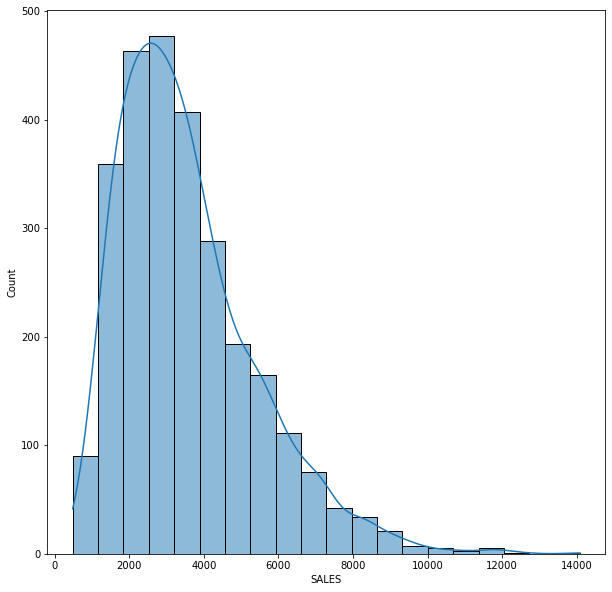

In [356]:
plt.figure(figsize = (10,10))
sns.histplot(data=df, x='SALES', kde=True, bins=20)

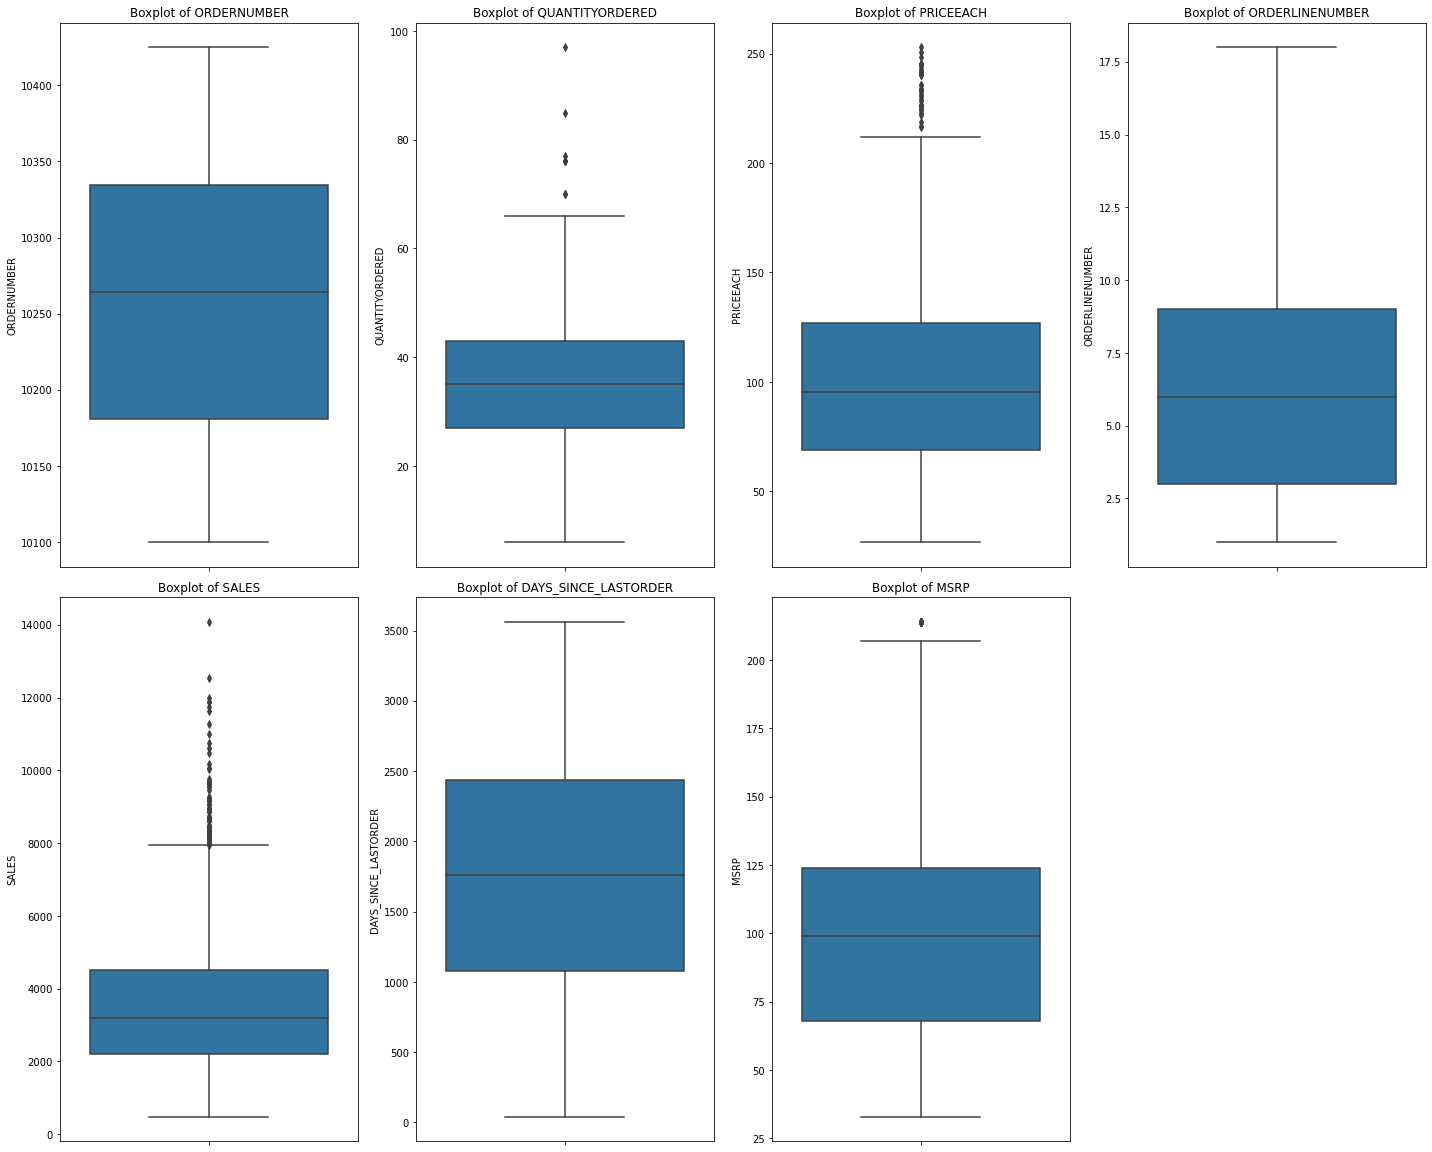

In [357]:
plt.figure(figsize = (20,40))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [358]:
df_cat.head()

,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,Shipped,Motorcycles,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,Shipped,Motorcycles,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,Shipped,Motorcycles,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,Shipped,Motorcycles,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,Shipped,Motorcycles,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


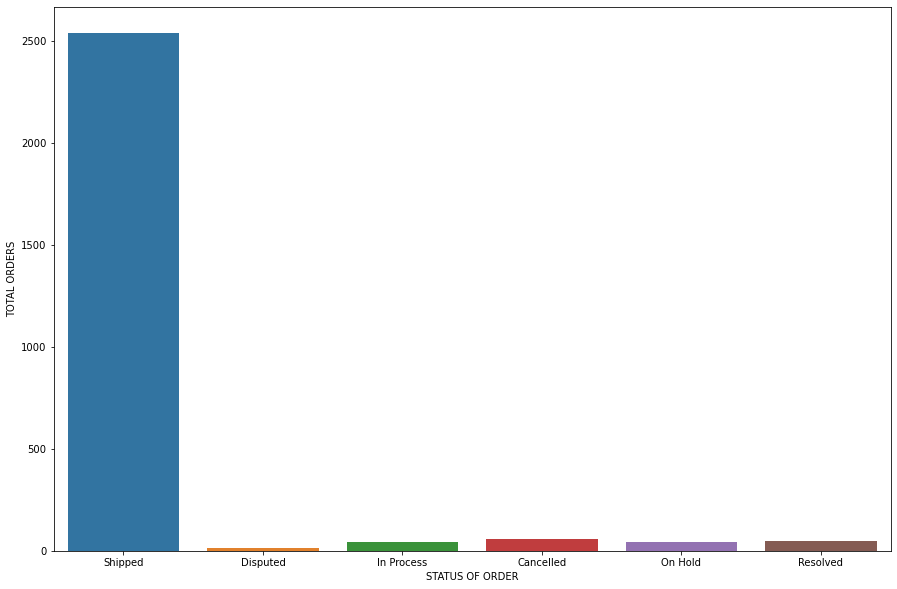

In [359]:
#Visualization of categorical variables
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='STATUS');
plt.xlabel('STATUS OF ORDER');
plt.ylabel('TOTAL ORDERS');

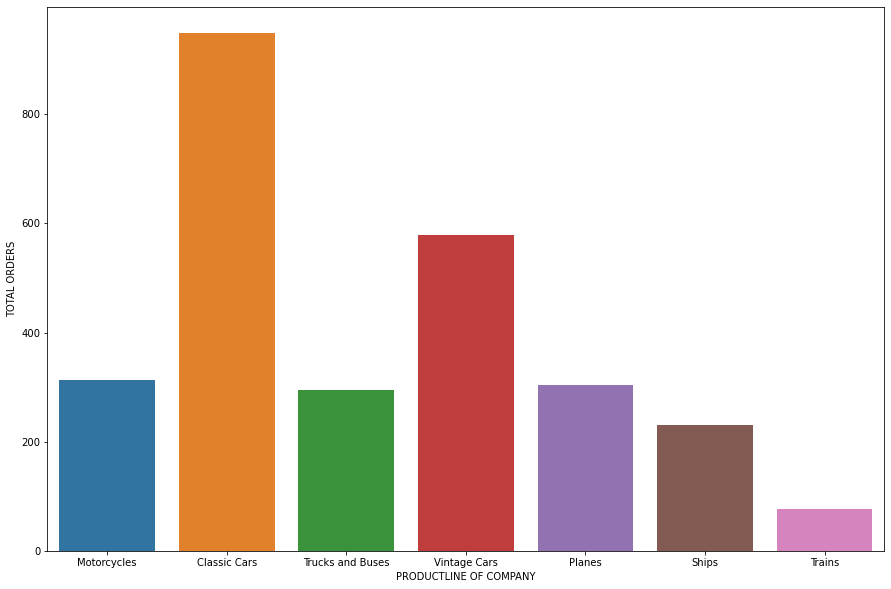

In [360]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='PRODUCTLINE');
plt.xlabel('PRODUCTLINE OF COMPANY');
plt.ylabel('TOTAL ORDERS');

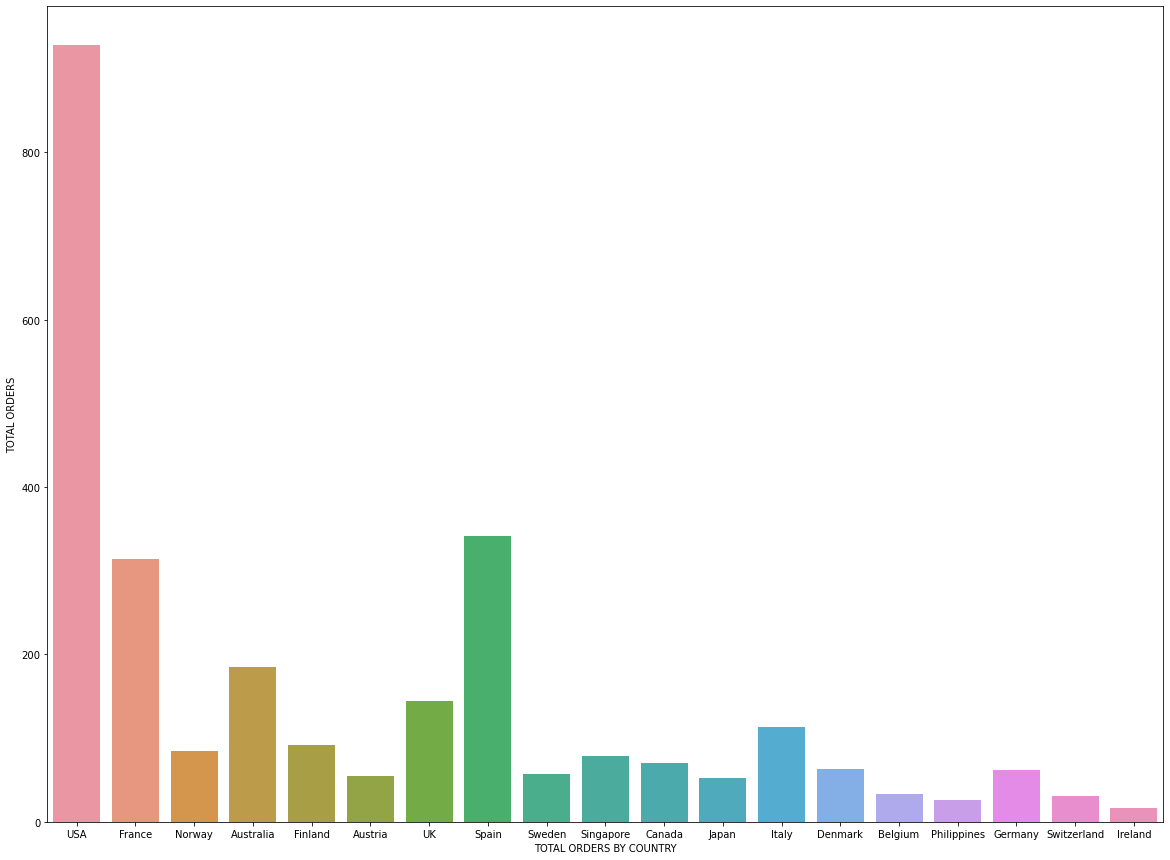

In [361]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='COUNTRY');
plt.xlabel('TOTAL ORDERS BY COUNTRY');
plt.ylabel('TOTAL ORDERS');

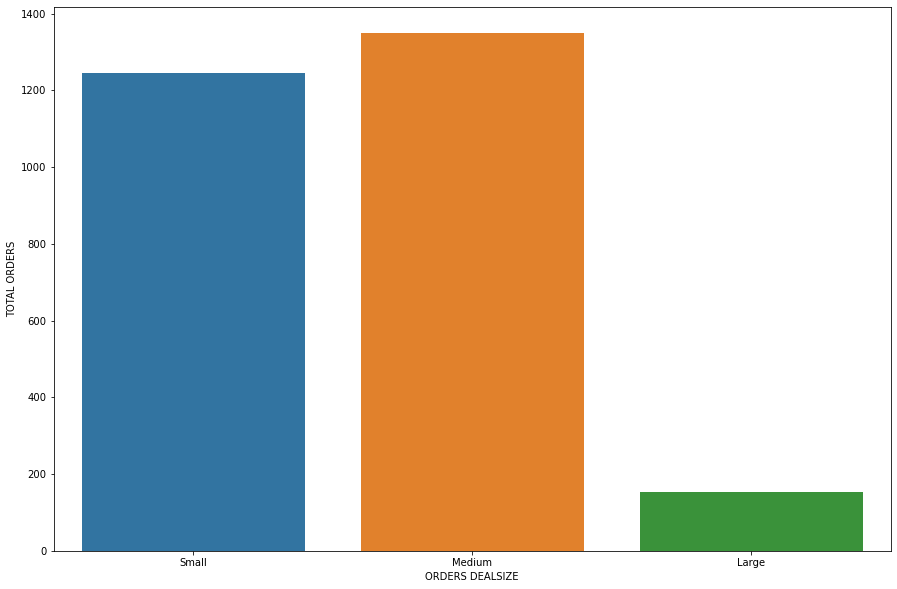

In [362]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='DEALSIZE');
plt.xlabel('ORDERS DEALSIZE');
plt.ylabel('TOTAL ORDERS');

# Sales with monthly, yearly plot

In [363]:
df_sales= df[['ORDERDATE','SALES']]
df_sales.head()

,ORDERDATE,SALES
0,2018-02-24,2871.00
1,2018-05-07,2765.90
2,2018-07-01,3884.34
3,2018-08-25,3746.70
4,2018-10-28,3479.76


In [364]:
df_sales['ORDERDATE']  = pd.to_datetime(df_sales['ORDERDATE'],dayfirst=True)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ORDERDATE  2747 non-null   datetime64[ns]
 1   SALES      2747 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.0 KB


C:\Users\balar\AppData\Local\Temp\ipykernel_3788\4013831795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['ORDERDATE']  = pd.to_datetime(df_sales['ORDERDATE'],dayfirst=True)


In [365]:
df_sales['year'] = df_sales['ORDERDATE'].dt.year
df_sales['month'] = df_sales['ORDERDATE'].dt.month
df_sales.head()

C:\Users\balar\AppData\Local\Temp\ipykernel_3788\1404548002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['year'] = df_sales['ORDERDATE'].dt.year
C:\Users\balar\AppData\Local\Temp\ipykernel_3788\1404548002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['month'] = df_sales['ORDERDATE'].dt.month


,ORDERDATE,SALES,year,month
0,2018-02-24,2871.00,2018,2
1,2018-05-07,2765.90,2018,5
2,2018-07-01,3884.34,2018,7
3,2018-08-25,3746.70,2018,8
4,2018-10-28,3479.76,2018,10


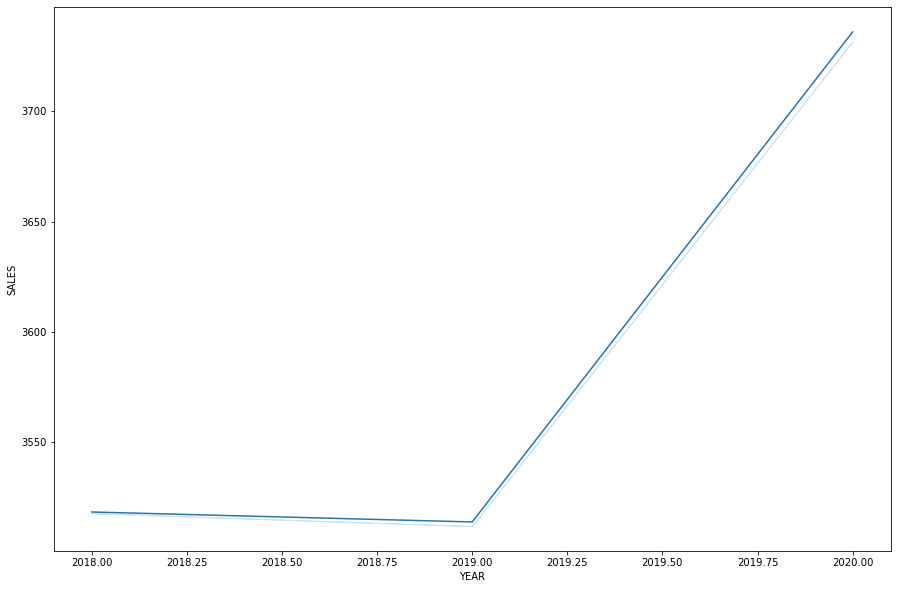

In [366]:
plt.figure(figsize=(15,10))
sns.lineplot(data = df_sales , x = 'year' , y = 'SALES',ci = False,);
plt.xlabel('YEAR');
plt.ylabel('SALES');

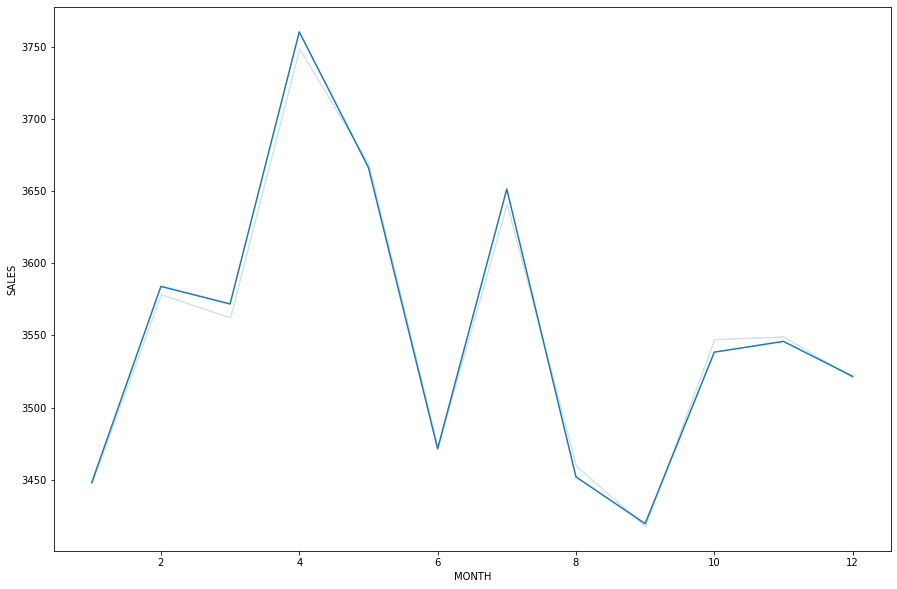

In [367]:
plt.figure(figsize=(15,10))
sns.lineplot(data = df_sales , x = 'month' , y = 'SALES',ci = False,);
plt.xlabel('MONTH');
plt.ylabel('SALES');

# Bivariate Analysis

## Numeric vs Numeric

In [368]:
df_num

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
0,10107,30,95.70,2,2871.00,828,95
1,10121,34,81.35,5,2765.90,757,95
2,10134,41,94.74,2,3884.34,703,95
3,10145,45,83.26,6,3746.70,649,95
4,10168,36,96.66,1,3479.76,586,95
...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2924,54
2743,10373,29,137.19,1,3978.51,2865,54
2744,10386,43,125.99,4,5417.57,2836,54
2745,10397,34,62.24,1,2116.16,2810,54


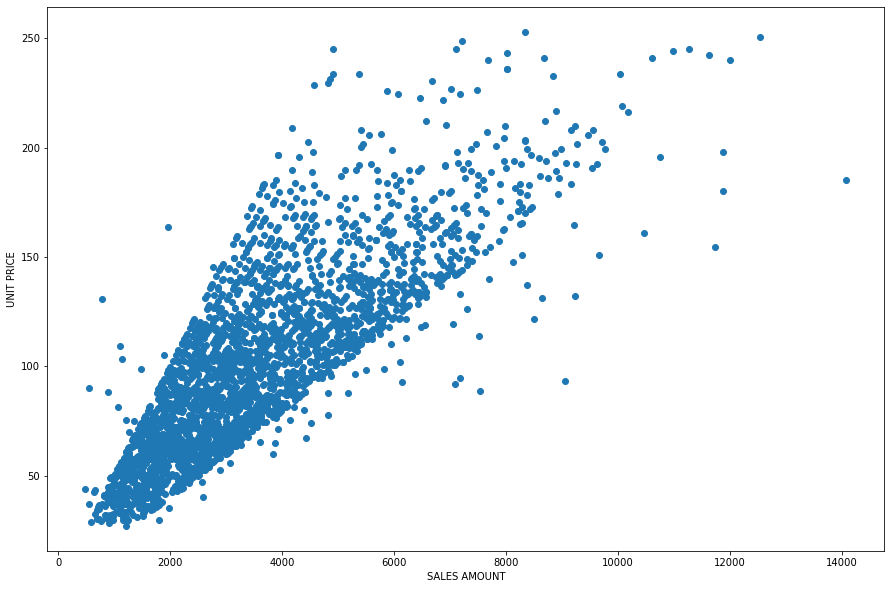

In [369]:
plt.figure(figsize=(15,10))
plt.xlabel('SALES AMOUNT')
plt.ylabel('UNIT PRICE')
plt.scatter(df['SALES'],df['PRICEEACH'])

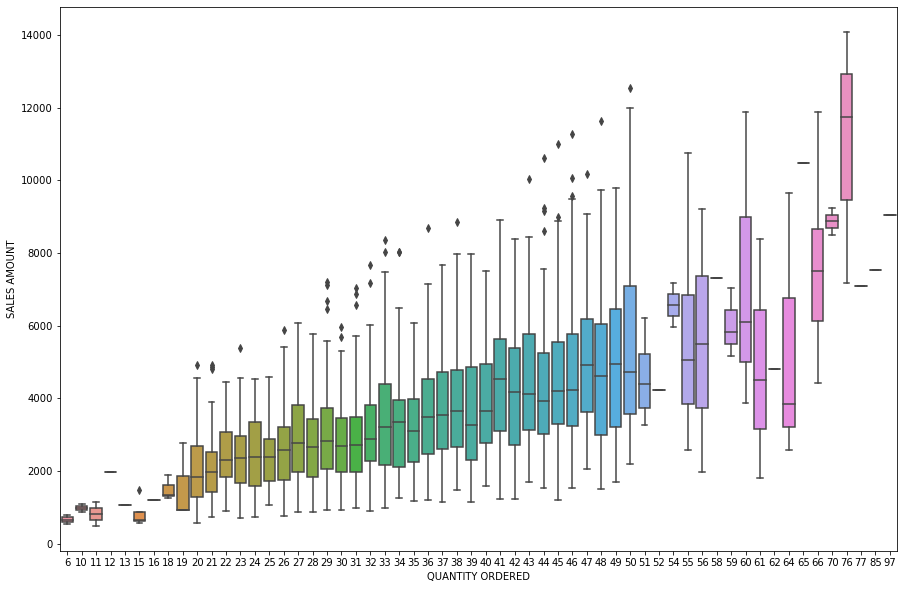

In [370]:
plt.figure(figsize=(15,10))
sns.boxplot(x='QUANTITYORDERED', y='SALES', data=df);
plt.xlabel('QUANTITY ORDERED')
plt.ylabel('SALES AMOUNT');

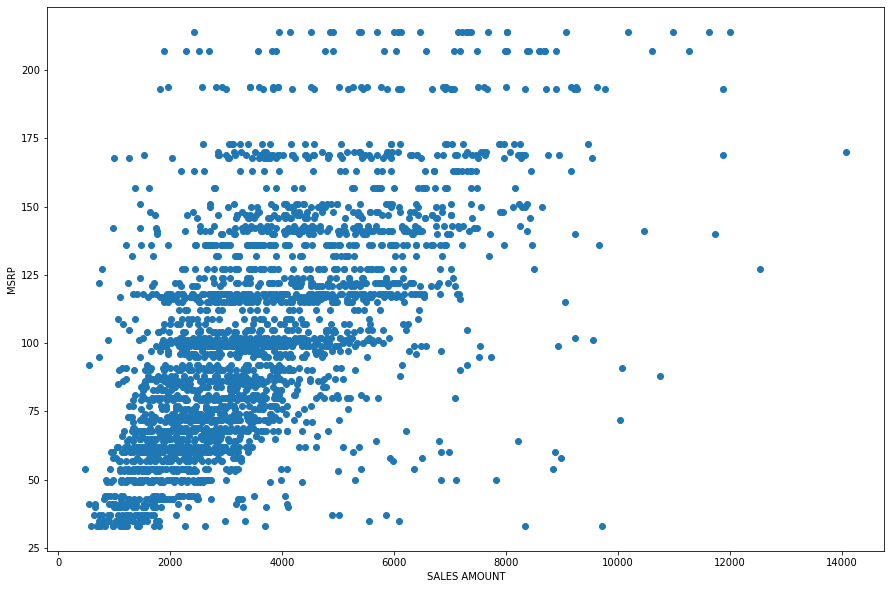

In [371]:
plt.figure(figsize=(15,10))
plt.xlabel('SALES AMOUNT')
plt.ylabel('MSRP')
plt.scatter(df['SALES'],df['MSRP'])

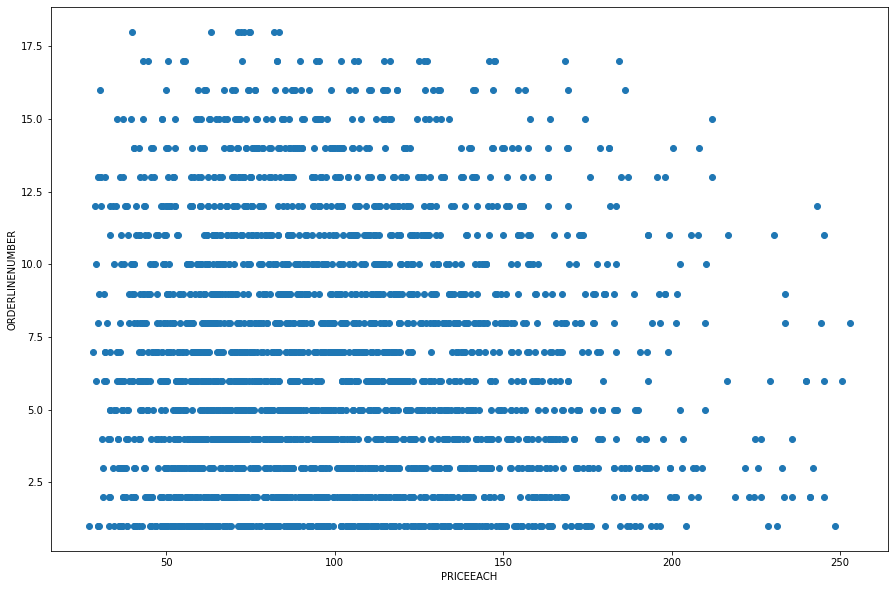

In [372]:
plt.figure(figsize=(15,10))
plt.xlabel('PRICEEACH')
plt.ylabel('ORDERLINENUMBER')
plt.scatter(df['PRICEEACH'],df['ORDERLINENUMBER'])

## Categorical vs Categorical

In [373]:
df_cat

,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,Shipped,Motorcycles,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,Shipped,Motorcycles,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,Shipped,Motorcycles,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,Shipped,Motorcycles,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,Shipped,Motorcycles,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
2742,Shipped,Ships,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,Shipped,Ships,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,Resolved,Ships,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,Shipped,Ships,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


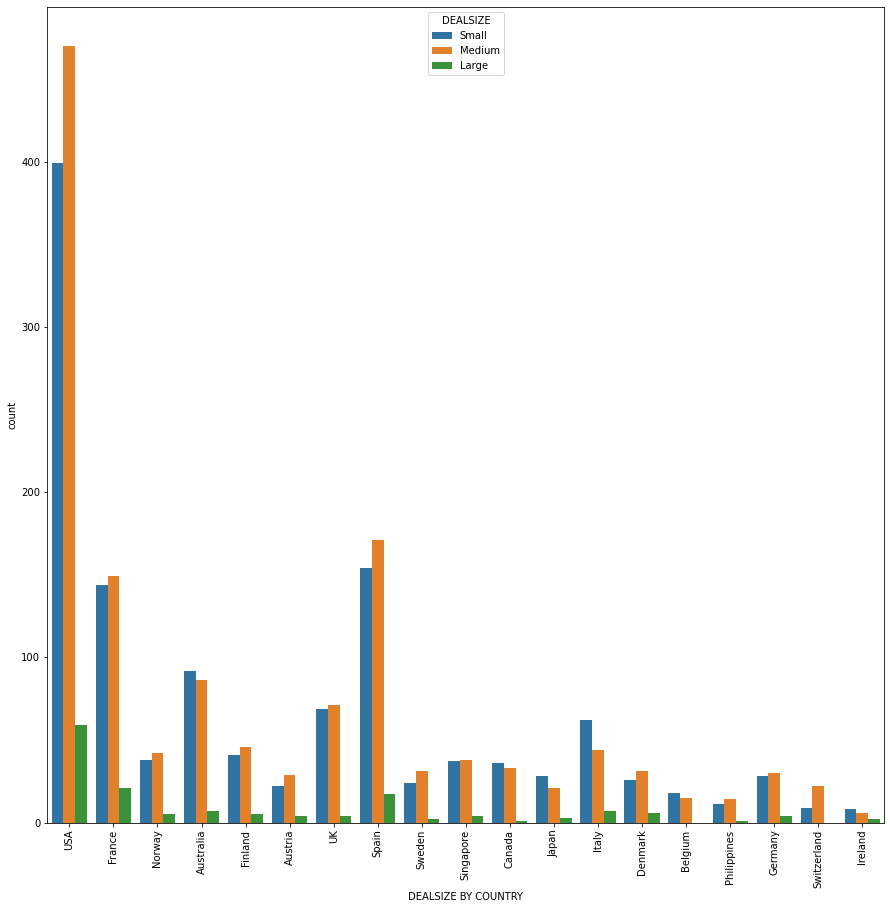

In [374]:
plt.figure(figsize=(15,15))
sns.countplot(x='COUNTRY', hue='DEALSIZE', data=df)
plt.xlabel('DEALSIZE BY COUNTRY')
plt.xticks(rotation=90);

In [375]:
pd.crosstab(df['COUNTRY'], df['DEALSIZE'], margins=True)

DEALSIZE,Large,Medium,Small,All
COUNTRY,,,,
Australia,7,86,92,185
Austria,4,29,22,55
Belgium,0,15,18,33
Canada,1,33,36,70
Denmark,6,31,26,63
Finland,5,46,41,92
France,21,149,144,314
Germany,4,30,28,62
Ireland,2,6,8,16


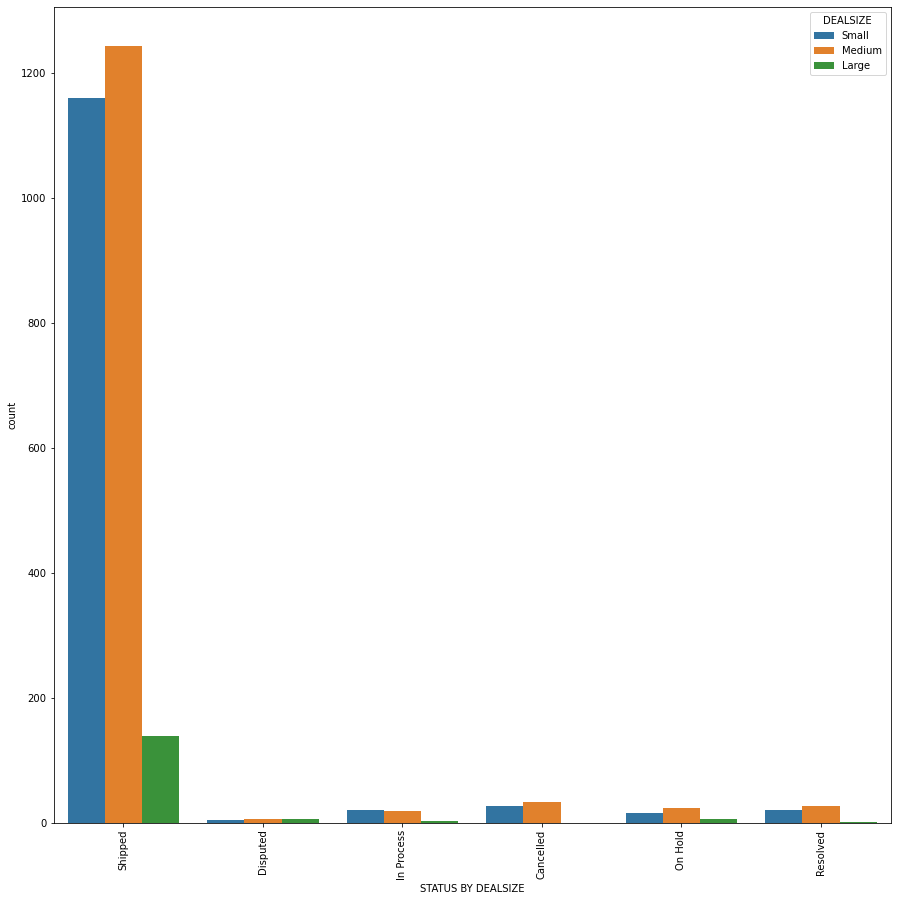

In [376]:
plt.figure(figsize=(15,15))
sns.countplot(x='STATUS', hue='DEALSIZE', data=df)
plt.xlabel('STATUS BY DEALSIZE')
plt.xticks(rotation=90);

In [377]:
pd.crosstab(df['STATUS'], df['DEALSIZE'], margins=True)

DEALSIZE,Large,Medium,Small,All
STATUS,,,,
Cancelled,0,33,27,60
Disputed,5,5,4,14
In Process,3,18,20,41
On Hold,5,24,15,44
Resolved,1,26,20,47
Shipped,138,1243,1160,2541
All,152,1349,1246,2747


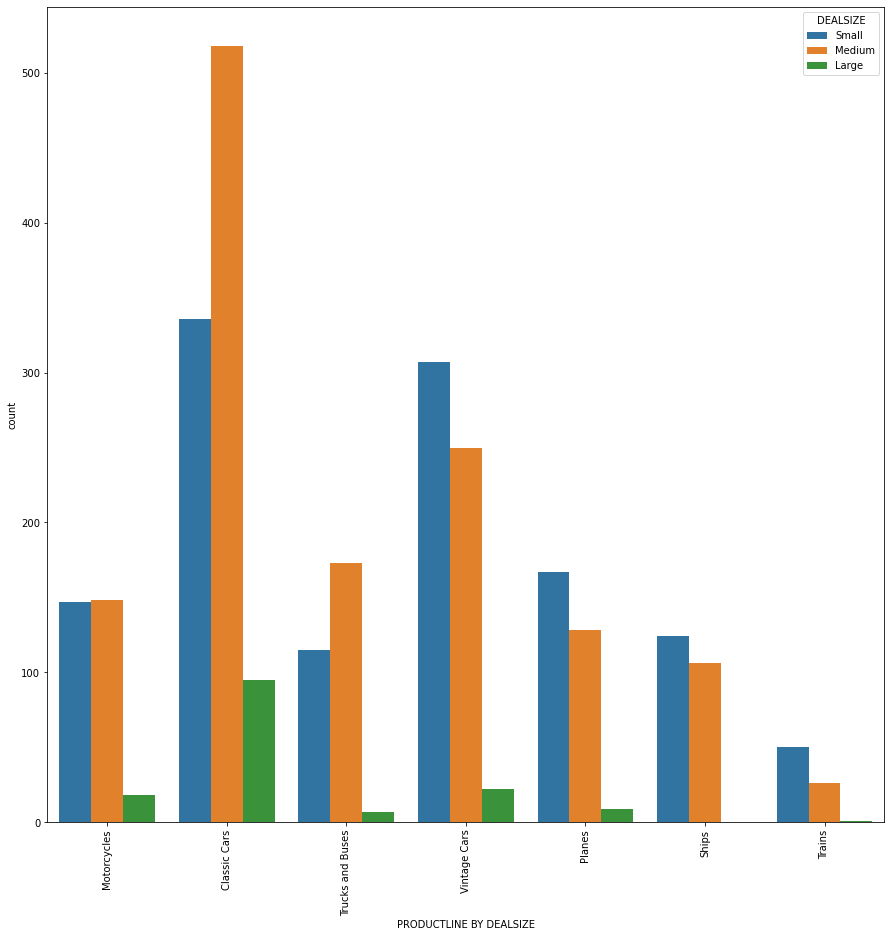

In [378]:
plt.figure(figsize=(15,15))
sns.countplot(x='PRODUCTLINE', hue='DEALSIZE', data=df)
plt.xlabel('PRODUCTLINE BY DEALSIZE')
plt.xticks(rotation=90);

In [379]:
pd.crosstab(df['PRODUCTLINE'], df['DEALSIZE'], margins=True)

DEALSIZE,Large,Medium,Small,All
PRODUCTLINE,,,,
Classic Cars,95,518,336,949
Motorcycles,18,148,147,313
Planes,9,128,167,304
Ships,0,106,124,230
Trains,1,26,50,77
Trucks and Buses,7,173,115,295
Vintage Cars,22,250,307,579
All,152,1349,1246,2747


Text(0, 0.5, 'SALES AMOUNT')

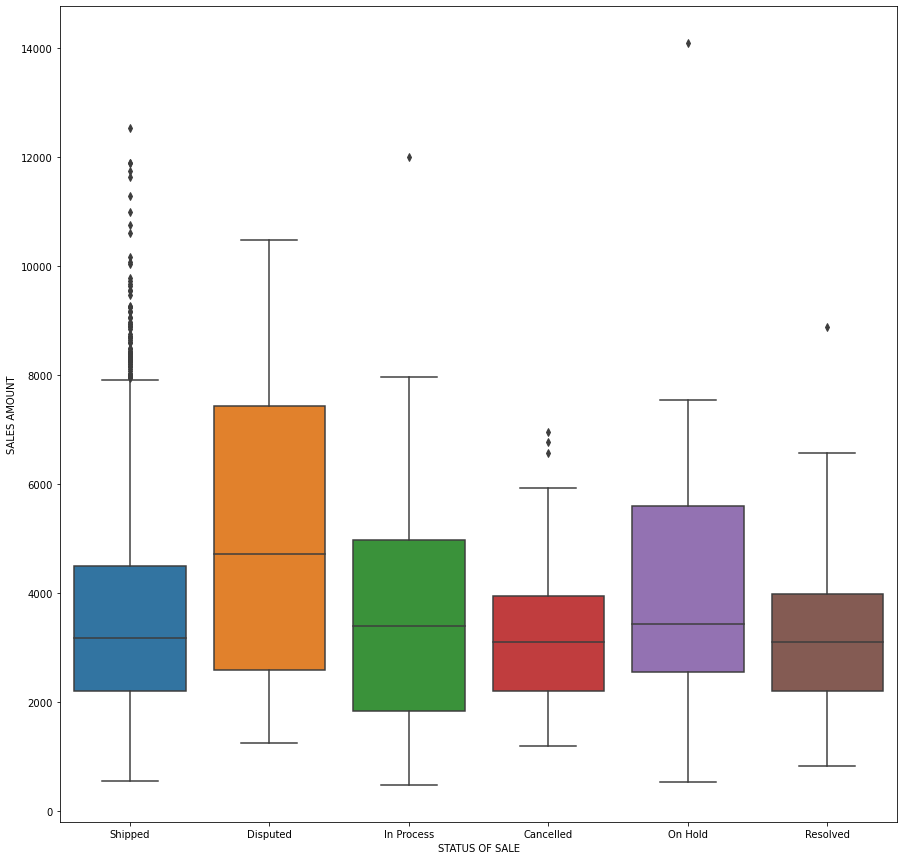

In [380]:
plt.figure(figsize=(15,15))
sns.boxplot(x='STATUS', y='SALES', data=df)
plt.xlabel('STATUS OF SALE')
plt.ylabel('SALES AMOUNT')

Text(0, 0.5, 'SALES AMOUNT')

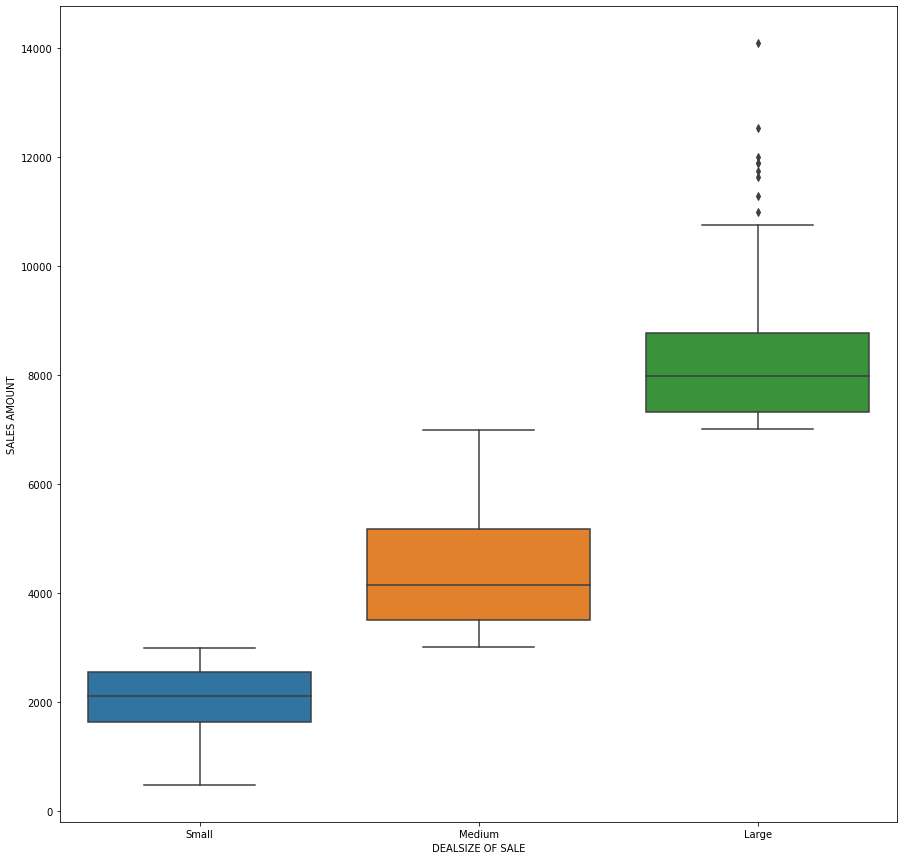

In [381]:
plt.figure(figsize=(15,15))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.xlabel('DEALSIZE OF SALE')
plt.ylabel('SALES AMOUNT')

Text(0, 0.5, 'SALES AMOUNT')

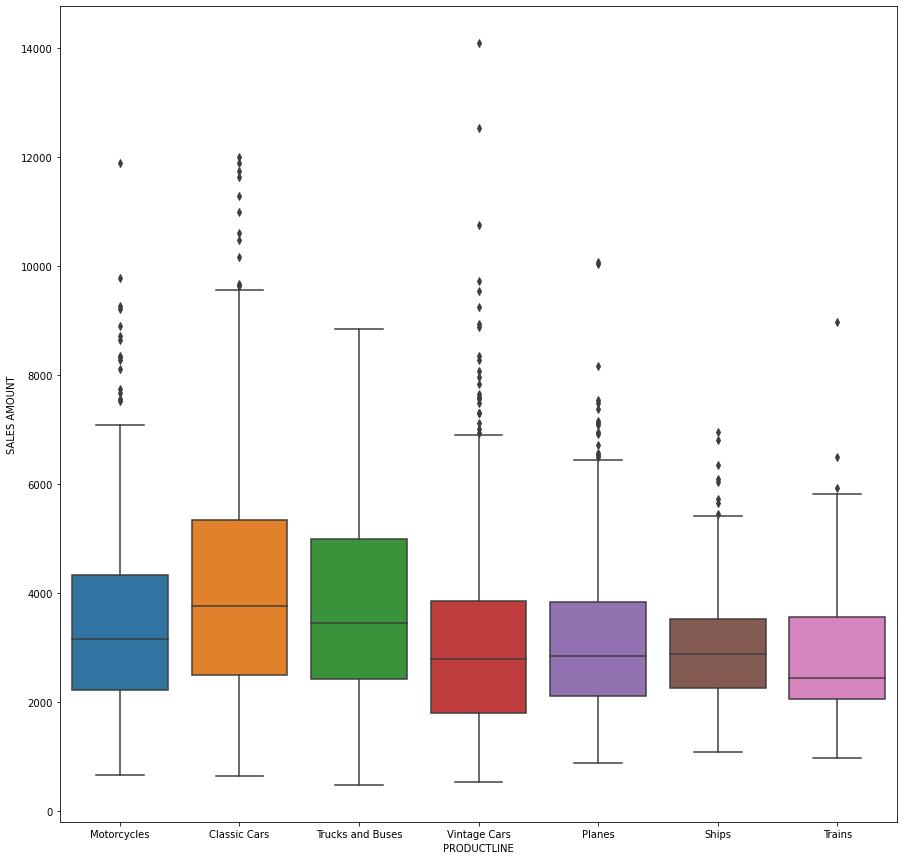

In [382]:
plt.figure(figsize=(15,15))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df);
plt.xlabel('PRODUCTLINE')
plt.ylabel('SALES AMOUNT')

# Multivariate Analysis

Text(0, 0.5, 'SALES AMOUNT')

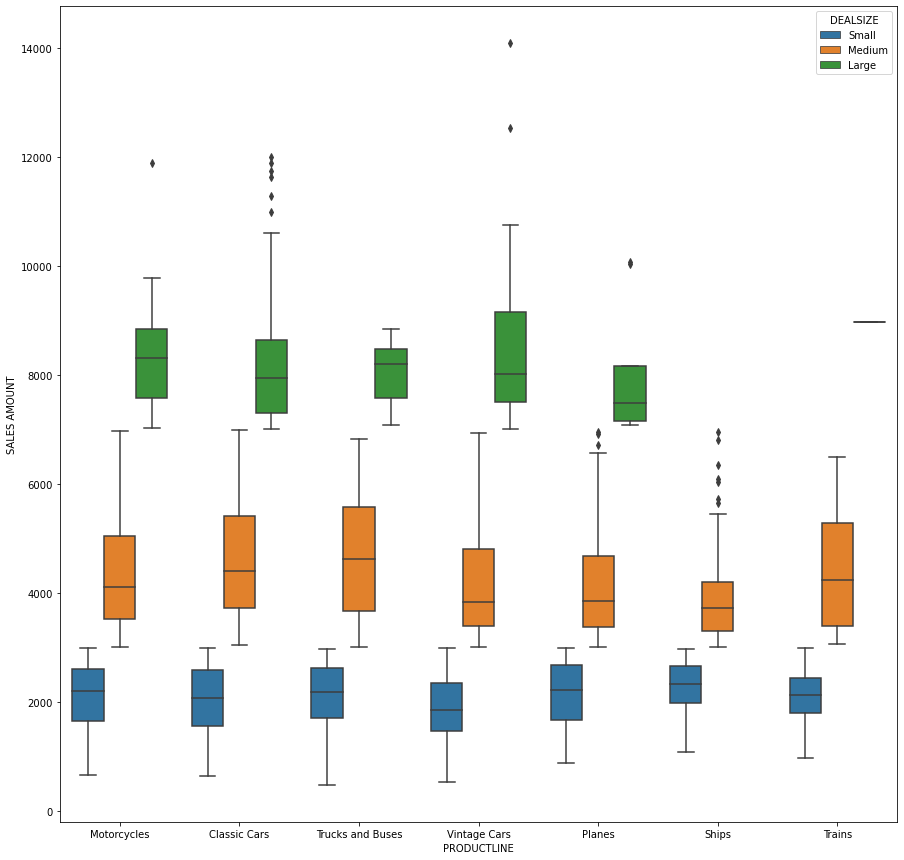

In [383]:
plt.figure(figsize=(15,15))
sns.boxplot(x='PRODUCTLINE', y='SALES', hue='DEALSIZE',data=df);
plt.xlabel('PRODUCTLINE')
plt.ylabel('SALES AMOUNT')

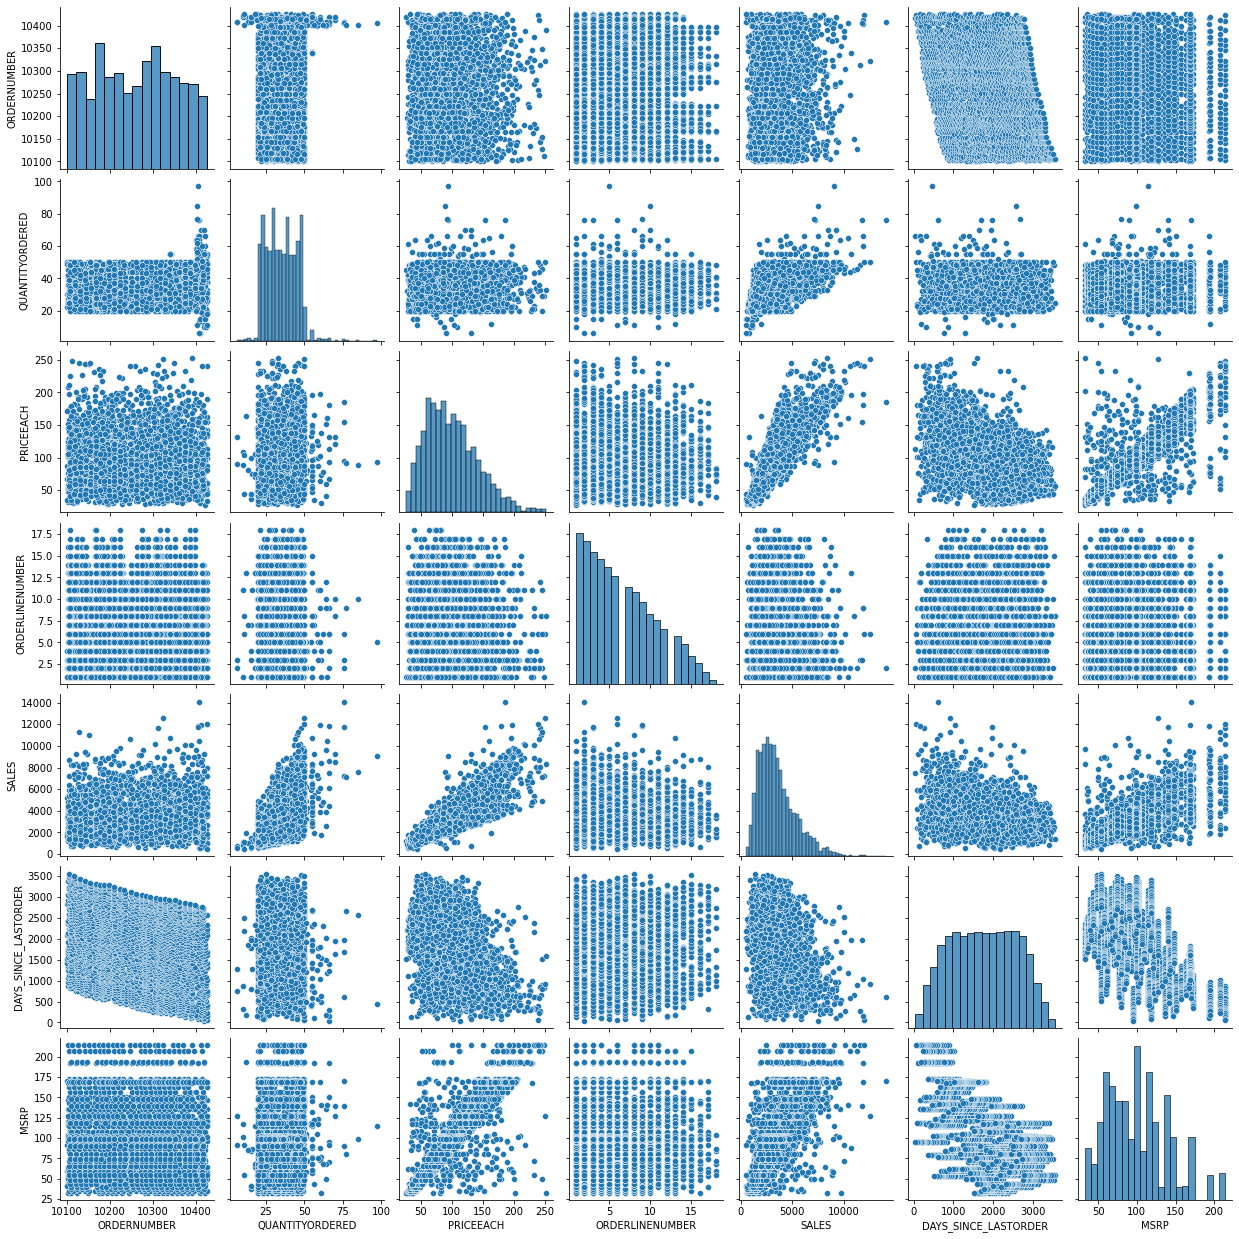

In [384]:
sns.pairplot(df);

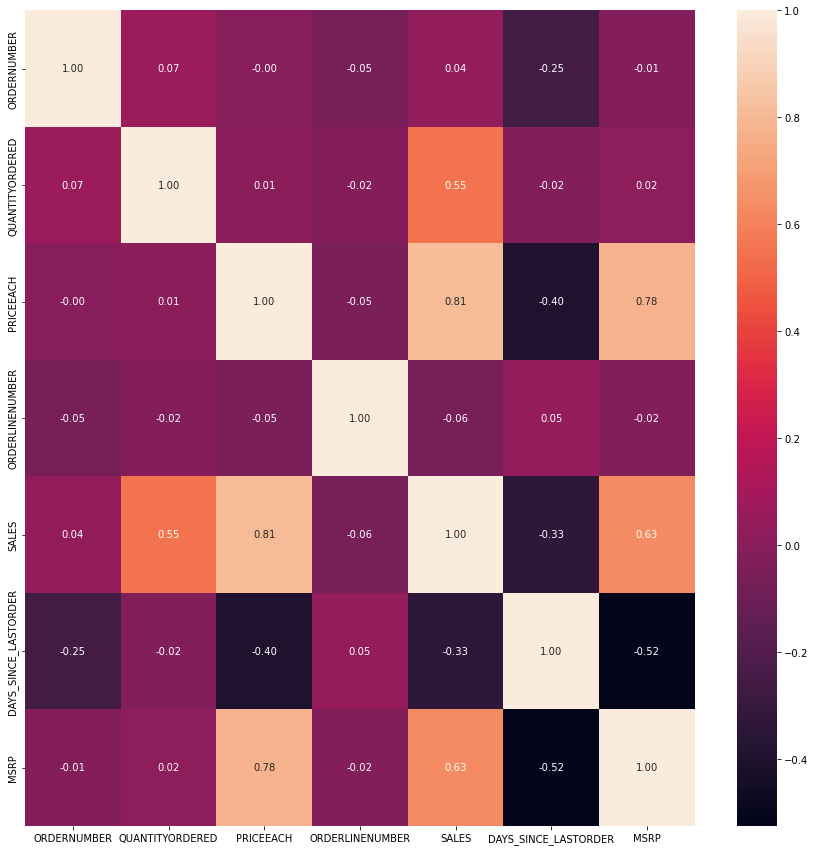

In [385]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");